<a href="https://colab.research.google.com/github/TuringCollegeSubmissions/mfikad-DWWP.4/blob/master/covid_in_south_korea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 in South Korea



##1. Introduction

The world is still struggling with one of the most rapidly spreading pandemics. There are a lot of people who say that data is the best weapon we can use in this "Corona Fight."

Here I imagine I am a data scientist in my country, and the president of the country asked me to analyze the COVID-19 patient-level data of South Korea and prepare my homeland for the next wave of the pandemic. As the data scientist of my country I have to create and prove a plan of fighting the pandemics in my country by analyzing the provided data. 

**1.1. About the Dataset**

This dataset consists of 11 csv files containing different informations about demographics of the people affected with COVID. With some other additional informations about different regions and provinces. This dataset has been accepted in NeurIPS 2020. More information [here](https://www.kaggle.com/datasets/kimjihoo/coronavirusdataset).

**1.2. Context**

* COVID-19 has infected more than 10,000 people in South Korea.
* KCDC (Korea Centers for Disease Control & Prevention) announces the information of COVID-19 quickly and transparently.
* We analyze and visualize the data using various data mining or visualization techniques.

##2. Questions to be answered in this notebook.

* Which provinces have the highest COVID infections?
* What are the most common infection cases? Are mass gatherings attributed to majority of the infections?
* Which age/gender groups are affected?
* Which age/ gender is the most released/ deceased?
* Is colder weather by any way attributed to higher infection levels?
* Do provinces with a large number of educational institution counts have higher infection rates?
* Do provinces with a large number of elderly people counts have higher infections/deceased people?
* Which age group is attributed to infecting people (as in transmitting COVID on to another person)?
* What are the different policies that have been applied to different regions? What effect did they have?



##3. Imports, Data Cleaning, and Data description

**3.1 Importing required modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.neural_network import MLPRegressor
from datetime import date, timedelta
from sklearn.linear_model import LinearRegression

**3.2 Loading the datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
case = pd.read_csv('drive/MyDrive/archive/Case.csv')
patient_info = pd.read_csv('drive/MyDrive/archive/PatientInfo.csv')
region = pd.read_csv('drive/MyDrive/archive/Region.csv')
time = pd.read_csv('drive/MyDrive/archive/Time.csv')
time_age = pd.read_csv('drive/MyDrive/archive/TimeAge.csv')
time_gender = pd.read_csv('drive/MyDrive/archive/TimeGender.csv')
time_province = pd.read_csv('drive/MyDrive/archive/TimeProvince.csv')
weather = pd.read_csv('drive/MyDrive/archive/Weather.csv')
policy = pd.read_csv('drive/MyDrive/archive/Policy.csv')

**3.3. Seeing what's in the data and checking for any null entries and duplicates**

In [4]:
case.isnull().sum()

 case_id          0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

In [5]:
case.duplicated().sum()

0

In [6]:
case.describe()['confirmed']

count     174.000000
mean       65.488506
std       355.097654
min         0.000000
25%         4.000000
50%        10.000000
75%        31.750000
max      4511.000000
Name: confirmed, dtype: float64

In [7]:
patient_info.isnull().sum()

patient_id               0
sex                   1122
age                   1380
country                  0
province                 0
city                    94
infection_case         919
infected_by           3819
contact_number        4374
symptom_onset_date    4475
confirmed_date           3
released_date         3578
deceased_date         5099
state                    0
dtype: int64

In [8]:
patient_info.shape

(5165, 14)

If we drop these missing values. We won't have anything to analyze.

In [9]:
patient_info.duplicated().sum()

0

In [10]:
region.isnull().sum()

code                        0
province                    0
city                        0
latitude                    0
longitude                   0
elementary_school_count     0
kindergarten_count          0
university_count            0
academy_ratio               0
elderly_population_ratio    0
elderly_alone_ratio         0
nursing_home_count          0
dtype: int64

In [11]:
region.duplicated().sum()

0

In [12]:
region.describe()

,code,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32912.090164,36.396996,127.661401,74.180328,107.901639,4.151639,1.294754,20.923730,10.644672,1159.258197
std,19373.349736,1.060304,0.904781,402.713482,588.788320,22.513041,0.592898,8.087428,5.604886,6384.185085
min,10000.000000,33.488936,126.263554,4.000000,4.000000,0.000000,0.190000,7.690000,3.300000,11.000000
25%,14027.500000,35.405263,126.927663,14.750000,16.000000,0.000000,0.870000,14.117500,6.100000,111.000000
50%,30075.000000,36.386601,127.384249,22.000000,31.000000,1.000000,1.270000,18.530000,8.750000,300.000000
75%,51062.500000,37.466119,128.473953,36.250000,55.250000,3.000000,1.612500,27.262500,14.625000,694.500000
max,80000.000000,38.380571,130.905883,6087.000000,8837.000000,340.000000,4.180000,40.260000,24.700000,94865.000000


In [13]:
time.isnull().sum()

date         0
time         0
test         0
negative     0
confirmed    0
released     0
deceased     0
dtype: int64

In [14]:
time.duplicated().sum()

0

In [15]:
time.describe()

,time,test,negative,confirmed,released,deceased
count,163.000000,1.630000e+02,1.630000e+02,163.000000,163.000000,163.000000
mean,4.122699,4.977797e+05,4.754839e+05,7834.865031,5604.312883,157.104294
std,7.019174,3.958830e+05,3.865611e+05,4666.040541,4544.317229,114.010916
min,0.000000,1.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000,9.648800e+04,5.877400e+04,3443.000000,29.000000,17.500000
50%,0.000000,5.030510e+05,4.773030e+05,10450.000000,7117.000000,208.000000
75%,16.000000,7.825585e+05,7.542225e+05,11116.000000,10100.500000,263.500000
max,16.000000,1.273766e+06,1.240157e+06,12800.000000,11537.000000,282.000000


In [16]:
time_age.isnull().sum()

date         0
time         0
age          0
confirmed    0
deceased     0
dtype: int64

In [17]:
time_age.duplicated().sum()

0

In [18]:
time_age.describe()

,time,confirmed,deceased
count,1089.0,1089.000000,1089.000000
mean,0.0,1158.129477,23.419651
std,0.0,822.619497,37.387911
min,0.0,32.000000,0.000000
25%,0.0,530.000000,0.000000
50%,0.0,1052.000000,3.000000
75%,0.0,1537.000000,35.000000
max,0.0,3362.000000,139.000000


In [19]:
time_gender.isnull().sum()

date         0
time         0
sex          0
confirmed    0
deceased     0
dtype: int64

In [20]:
time_gender.duplicated().sum()

0

In [21]:
time_gender.describe()

,time,confirmed,deceased
count,242.0,242.000000,242.000000
mean,0.0,5211.545455,105.384298
std,0.0,1293.219316,40.037910
min,0.0,1591.000000,9.000000
25%,0.0,4328.500000,82.000000
50%,0.0,5118.000000,125.000000
75%,0.0,6416.750000,131.000000
max,0.0,7305.000000,151.000000


In [22]:
time_province.isnull().sum()

date         0
time         0
province     0
confirmed    0
released     0
deceased     0
dtype: int64

In [23]:
time_province.duplicated().sum()

0

In [24]:
time_province.describe()

,time,confirmed,released,deceased
count,2771.000000,2771.000000,2771.000000,2771.000000
mean,4.122699,444.308192,320.726453,9.239986
std,6.998873,1360.890963,1126.041255,32.638615
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,1.000000,0.000000
50%,0.000000,42.000000,21.000000,0.000000
75%,16.000000,133.000000,92.000000,1.000000
max,16.000000,6906.000000,6700.000000,189.000000


In [25]:
weather.isnull().sum()

code                      0
province                  0
date                      0
avg_temp                 15
min_temp                  5
max_temp                  3
precipitation             0
max_wind_speed            9
most_wind_direction      29
avg_relative_humidity    20
dtype: int64

In [26]:
weather.duplicated().sum()

0

In [27]:
weather.describe()

,code,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
count,26271.000000,26256.000000,26266.000000,26268.000000,26271.000000,26262.000000,26242.000000,26251.000000
mean,32124.662175,13.859423,9.665396,18.778826,1.486799,5.109500,195.900084,65.695566
std,20313.487872,9.520334,9.896768,9.586279,8.189636,2.016256,106.166524,17.195339
min,10000.000000,-14.800000,-19.200000,-11.900000,0.000000,1.000000,20.000000,10.400000
25%,13500.000000,6.000000,1.400000,10.900000,0.000000,3.800000,90.000000,53.600000
50%,20000.000000,14.600000,9.900000,19.800000,0.000000,4.700000,200.000000,66.900000
75%,50500.000000,21.900000,18.200000,26.700000,0.000000,6.000000,290.000000,78.600000
max,70000.000000,33.900000,30.300000,40.000000,266.000000,29.400000,360.000000,100.000000


In [28]:
weather.shape

(26271, 10)

In [29]:
weather = weather.dropna()

Dropping missing value rows

In [30]:
weather.shape

(26224, 10)

In [31]:
policy.isnull().sum()

policy_id      0
country        0
type           0
gov_policy     0
detail         2
start_date     0
end_date      37
dtype: int64

We see missing values in end dates because some policies didn't end at least up until the time this data was recorded.

In [32]:
policy.duplicated().sum()

0

##4. EDA and Visualizations

**4.1. Province Related**

In [33]:
def data_range(data, column, describe=None):
    """
    @ PARAMS
        data(dataframe) = data to check
        column(string) = column name for date
        describe(string) = additional description on date column
    """
    data_col = pd.to_datetime(data[column]).dt.date
    date_range = (max(data_col) - min(data_col)).days + 1
    if describe == None:
        print(f'Date range: {date_range} days')
    else:
        print(f'Date range ({describe}): {date_range} days')
    print(f'# {min(data_col)} to {max(data_col)}')
    return None

data_range(time_province, 'date')

Date range: 163 days
# 2020-01-20 to 2020-06-30


This function is to check date range of time series or scarce chronological data.

Here we are getting the time range for time province dataframe.

In [34]:
loc_latest = time_province[time_province.date==time_province.date.iloc[-1]]
del loc_latest['date']
del loc_latest['time']
loc_latest = loc_latest.iloc[:, :2]
loc_latest['proportion'] = round(loc_latest.confirmed / sum(loc_latest.confirmed) * 100, 2)
loc_latest = loc_latest.sort_values('proportion', ascending=False)
loc_latest.set_index(np.arange(1, len(loc_latest)+1), inplace=True)
loc_latest_all = loc_latest.copy()
loc_latest_all

,province,confirmed,proportion
1,Daegu,6906,57.19
2,Gyeongsangbuk-do,1389,11.50
3,Seoul,1312,10.86
4,Gyeonggi-do,1207,10.00
5,Incheon,341,2.82
6,Chungcheongnam-do,167,1.38
7,Busan,154,1.28
8,Gyeongsangnam-do,134,1.11
9,Daejeon,117,0.97
10,Gangwon-do,65,0.54


Here we are trying to see which regions have the highest share in the number of confirmed cases in total.

In [35]:
loc_latest.loc['18',:] = loc_latest.iloc[6:, :].sum()
loc_latest.loc['18','province'] = 'Others'
loc_latest = loc_latest[loc_latest.proportion > loc_latest.iloc[5, 2]]
loc_latest

,province,confirmed,proportion
1,Daegu,6906.0,57.19
2,Gyeongsangbuk-do,1389.0,11.50
3,Seoul,1312.0,10.86
4,Gyeonggi-do,1207.0,10.00
5,Incheon,341.0,2.82
18,Others,754.0,6.25


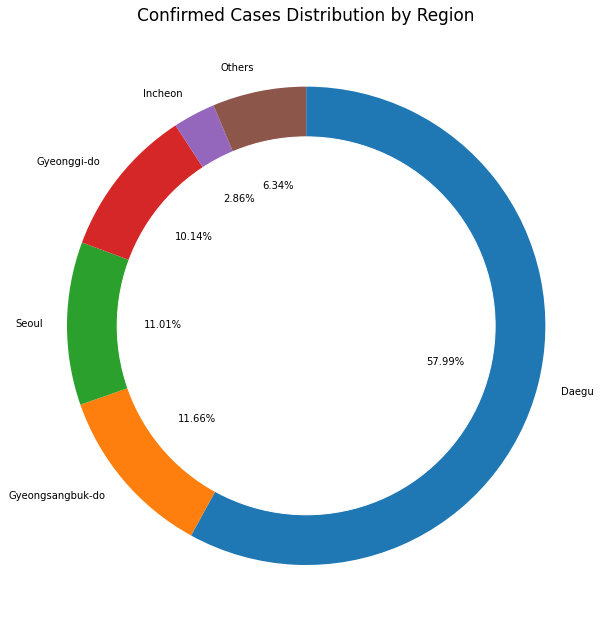

In [36]:
plt.subplots(figsize=(11, 11))
plt.title(f'Confirmed Cases Distribution by Region', fontsize=17)
pop_circle = plt.Circle((0,0), 0.79, color='white')
plt.pie(loc_latest.proportion, 
        labels=loc_latest.province, 
        autopct='%.2f%%', 
        startangle=90, 
        counterclock=False
      )
p = plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()

The provinces Daegu and Gyeongsangbuk-do incorporate almost 70% of total cases. These provinces require utmost attention.

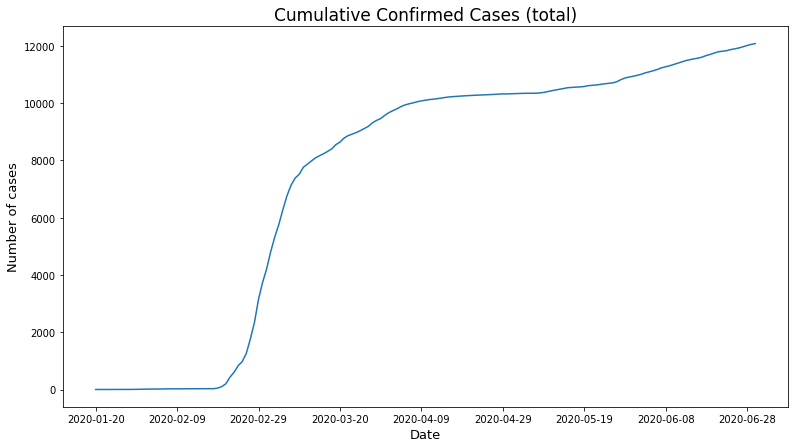

In [37]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Confirmed Cases (total)', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(time_province.date.unique(), 
         time_province.groupby('date').sum().confirmed)
ax.set_xticks(ax.get_xticks()[::int(len(time_province.date.unique())/8)])
plt.show()

Here we see that in the time range between 2020-03-20 and 2020-04-09 number of confirmed cases exploded exponentially. This happend (according to different sources) due to public gathering events during those times.

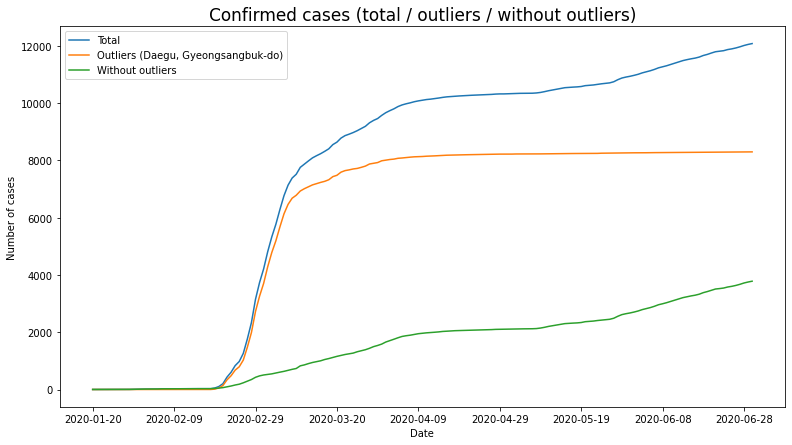

In [38]:
total_list = time_province.groupby('date').sum().confirmed
outliers = time_province[(time_province.province=='Daegu')\
                        | (time_province.province=='Gyeongsangbuk-do')
                       ].groupby('date').sum().confirmed
wo_outliers = time_province[(time_province.province!='Daegu') 
                           & (time_province.province!='Gyeongsangbuk-do')
                          ].groupby('date').sum().confirmed
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Confirmed cases (total / outliers / without outliers)', fontsize=17)
plt.plot(time_province.date.unique(), total_list)
plt.plot(time_province.date.unique(), outliers)
plt.plot(time_province.date.unique(), wo_outliers)
ax.set_xticks(ax.get_xticks()[::int(len(time_province.date.unique())/8)])
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.legend(['Total', 'Outliers (Daegu, Gyeongsangbuk-do)', 'Without outliers'])

plt.show()

Now here we see something interseting for regions other than Daegu and Gyeongsangbuk-do have a more steady curve. What this entails is the burst of cases happend actually in these two regions and can not be attributed to the entireity of South Korea.

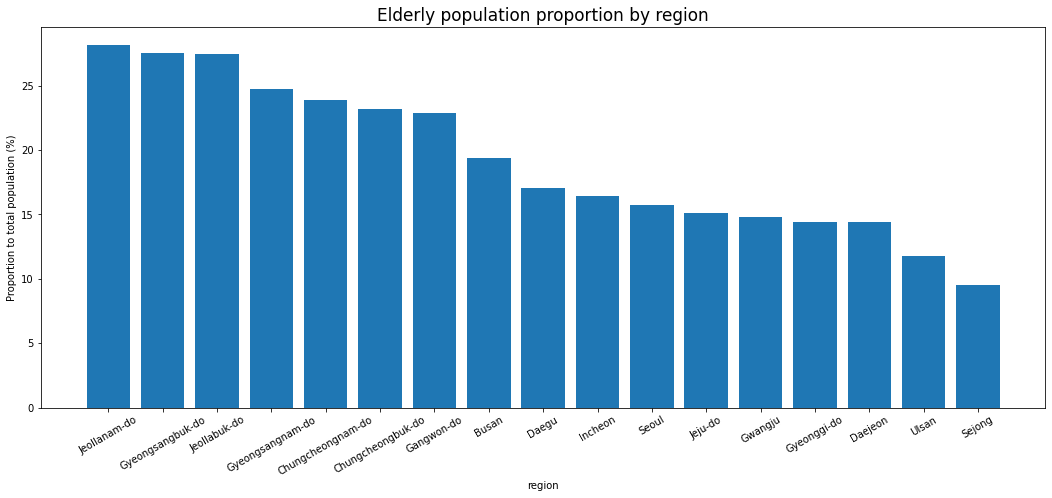

In [39]:
elderly_pop_df = pd.DataFrame(region[region.province!='Korea']
                          .groupby('province').mean()
                          .elderly_population_ratio
                          .sort_values(ascending=False)
                         )

plt.subplots(figsize=(18, 7))
plt.title('Elderly population proportion by region', fontsize=17)
plt.xticks(rotation=30)
plt.bar(elderly_pop_df.index, elderly_pop_df.elderly_population_ratio)
plt.xlabel('region')
plt.ylabel('Proportion to total population (%)')
plt.show()

When we try to look at the number of elderly people in each province. We see that except for Gyeongsangbuk-do most higly affected provinces don't have a significant number of elderly people.

In [40]:
elderly_new = elderly_pop_df.copy()
elderly_new['confirmed'] = time_province[time_province.date==time_province.date.iloc[-1]]\
                                .groupby('province').sum().confirmed
elderly_new['confirmed'] = elderly_new.confirmed.fillna(0)
elderly_new['elderly_confirmed'] = elderly_new.elderly_population_ratio\
                                        * elderly_new.confirmed / 100
elderly_new['elderly_confirmed'] = elderly_new.elderly_confirmed.astype(int)
elderly_new = elderly_new.sort_values('elderly_confirmed', ascending=False)

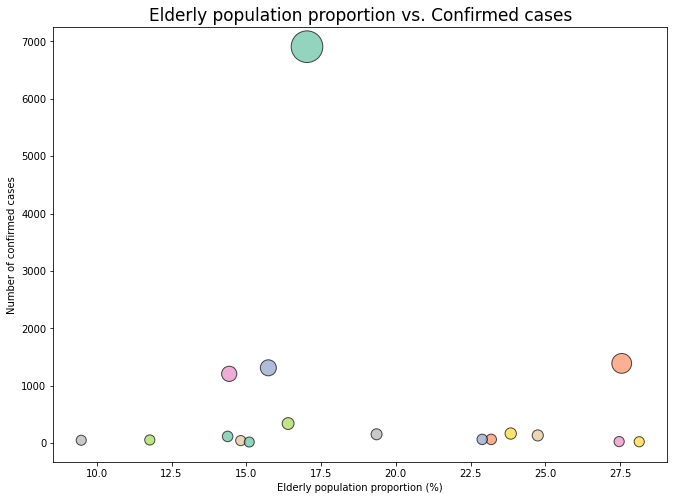

In [41]:
plt.figure(figsize=(11,8))
sns.scatterplot(x=elderly_new.elderly_population_ratio, 
                y=elderly_new.confirmed, \
                size=elderly_new.elderly_confirmed, 
                sizes=(100, 1000), 
                hue=elderly_new.index, 
                legend=False, 
                palette='Set2', 
                alpha=0.7, 
                edgecolor='black', 
                linewidth=1, 
                data=elderly_new
            )
plt.title('Elderly population proportion vs. Confirmed cases', fontsize=17)
plt.xlabel('Elderly population proportion (%)')
plt.ylabel('Number of confirmed cases')
plt.show()

Here we can see we can't really attribute elderly populations to higer infection rates.

In [42]:
elderly_deceased = elderly_pop_df.copy()
elderly_deceased['deceased'] = time_province[time_province.date==time_province.date.iloc[-1]]\
                                .groupby('province').sum().deceased
elderly_deceased['deceased'] = elderly_deceased.deceased.fillna(0)
elderly_deceased['elderly_deceased'] = elderly_deceased.elderly_population_ratio\
                                        * elderly_deceased.deceased / 100
elderly_deceased['elderly_deceased'] = elderly_deceased.elderly_deceased.astype(int)
elderly_deceased = elderly_deceased.sort_values('elderly_deceased', ascending=False)

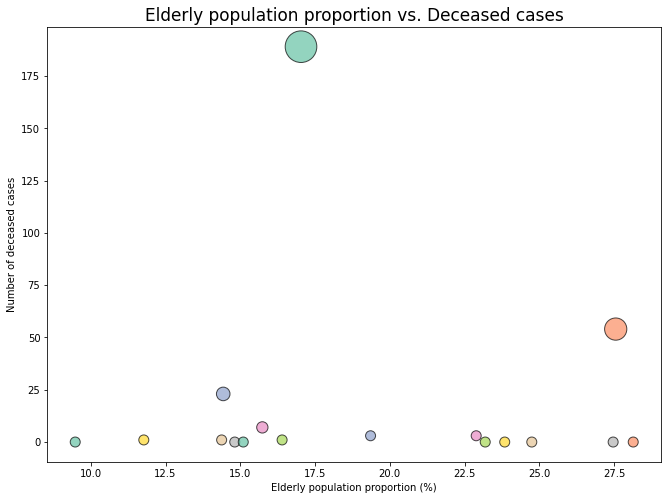

In [43]:
plt.figure(figsize=(11,8))
sns.scatterplot(x=elderly_deceased.elderly_population_ratio, 
                y=elderly_deceased.deceased, 
                size=elderly_deceased.elderly_deceased, 
                sizes=(100, 1000), 
                hue=elderly_deceased.index, 
                legend=False, 
                palette='Set2', 
                alpha=0.7, 
                edgecolor='black', 
                linewidth=1, 
                data=elderly_deceased
                )
plt.title('Elderly population proportion vs. Deceased cases', fontsize=17)
plt.xlabel('Elderly population proportion (%)')
plt.ylabel('Number of deceased cases')
plt.show()

Here also we can not find a strong attribution between those.

In [44]:
school_count = region[region.province!='Korea'].groupby('province').sum()
school_count['total_school_count'] = school_count.elementary_school_count\
                                      + school_count.kindergarten_count\
                                        + school_count.university_count
school_count = school_count[['total_school_count']]

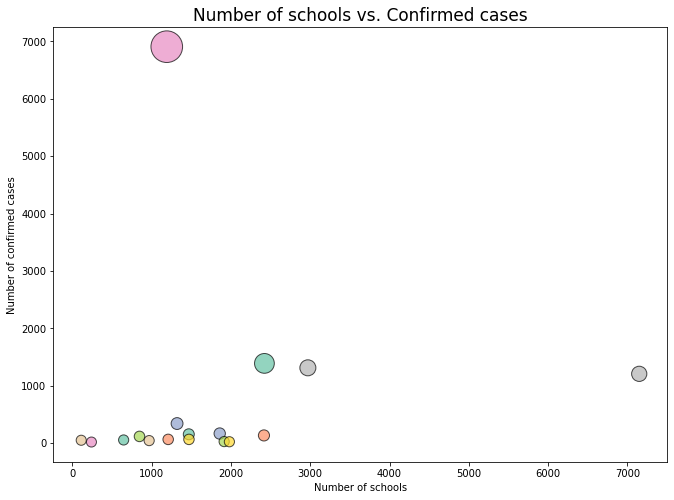

In [45]:
plt.figure(figsize=(11,8))
sns.scatterplot(x=school_count.total_school_count, 
                y=elderly_new.confirmed, 
                size=elderly_new.elderly_confirmed, 
                sizes=(100, 1000), 
                hue=elderly_new.index, 
                legend=False, 
                palette='Set2', 
                alpha=0.7, 
                edgecolor='black', 
                linewidth=1, 
                data=elderly_new
                )
plt.title('Number of schools vs. Confirmed cases', fontsize=17)
plt.xlabel('Number of schools')
plt.ylabel('Number of confirmed cases')
plt.show()

Still we can see the number of schools and universities didn't really attribute to higher infection levels.

**4.2. Age Related**

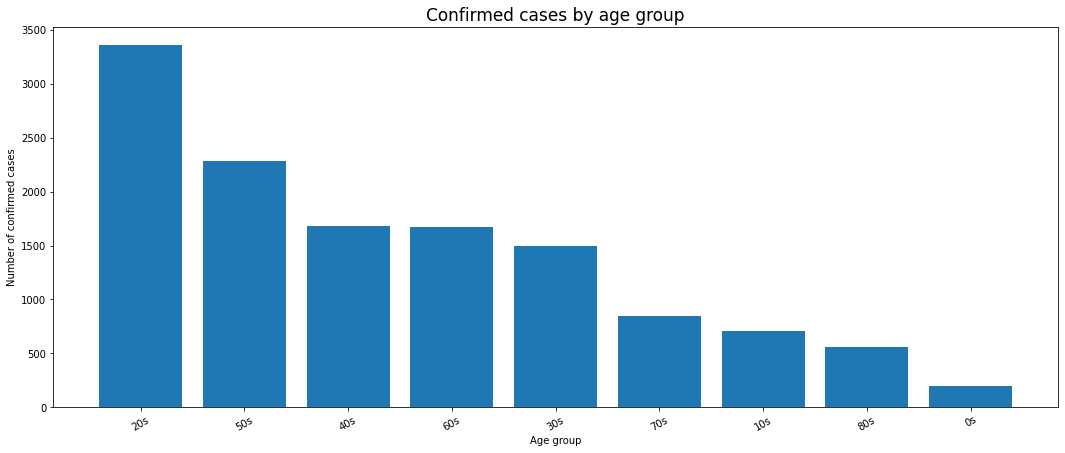

In [46]:
age_df = time_age[time_age.date==time_age.date.iloc[-1]].groupby('age').sum().confirmed
age_df = age_df.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(18, 7))
plt.title('Confirmed cases by age group', fontsize=17)
plt.xticks(rotation=30)
plt.bar(age_df.index, age_df)
plt.xlabel('Age group')
plt.ylabel('Number of confirmed cases')
plt.show()

People in their 20s are the most affacted as comapred to other age groups.

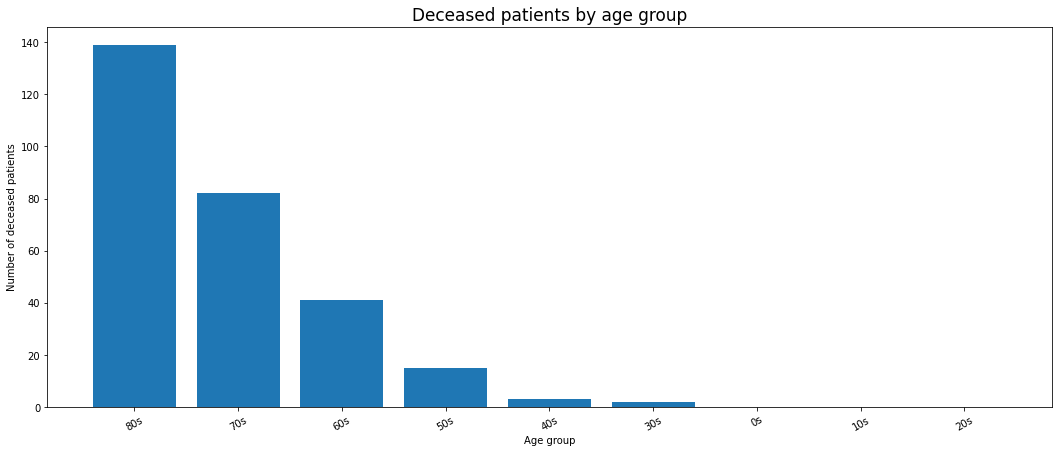

In [47]:
age_df = time_age[time_age.date==time_age.date.iloc[-1]]\
                                .groupby('age').sum().deceased
age_df = age_df.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(18, 7))
plt.title('Deceased patients by age group', fontsize=17)
plt.xticks(rotation=30)
plt.bar(age_df.index, age_df)
plt.xlabel('Age group')
plt.ylabel('Number of deceased patients')
plt.show()

But people in their 80s surprisingly have the highest death tolls eventhough they are not among the highest infected people. The age group of the 20s have a staggering minimal number of deceased patients which tells us that most of the patients in their 20s do recover majority of the time.

In [48]:
infected_by_df = patient_info[patient_info.infected_by.notnull()].infected_by
infected_by_df = pd.DataFrame(infected_by_df)

In [49]:
infected_by_list = []
for i in range(len(infected_by_df)):
    infected_by_list.append(infected_by_df.iloc[i].infected_by)
infected_by_set = set(infected_by_list)

Iterate through the infected_by_df dataframe and get the patient ids in the infected_by column and then put the results in a list


In [50]:
infected_by_age = {}
for j in range(len(patient_info)):
    val = str(patient_info.iloc[j].patient_id)
    if val in infected_by_set:
        infected_by_age[patient_info.iloc[j].patient_id] = patient_info.iloc[j].age

Now iterate through the list and locate the ages of the patients in the patient_info dataframe after that put the resultts in a dictionary

In [51]:
infected_by_age_df = pd.DataFrame(infected_by_age.items(), columns=['patient_id', 'age'])

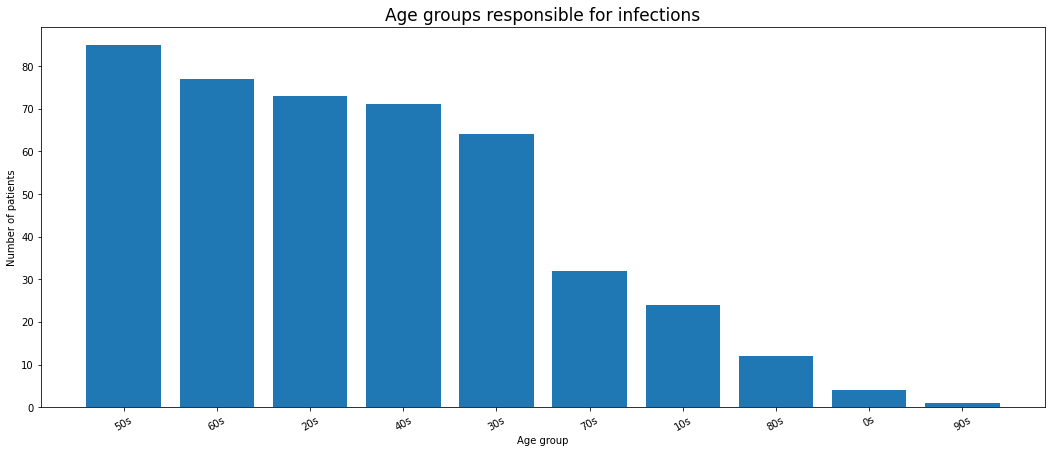

In [52]:
infected_by_age_df = infected_by_age_df.groupby('age').count()
infected_by_age_df = infected_by_age_df.sort_values('patient_id', ascending=False)

fig, ax = plt.subplots(figsize=(18, 7))
plt.title('Age groups responsible for infections', fontsize=17)
plt.xticks(rotation=30)
plt.bar(infected_by_age_df.index, infected_by_age_df.patient_id)
plt.xlabel('Age group')
plt.ylabel('Number of patients')
plt.show()

People in thier 50s are the ones that are the most responsible ones. Most of the time what we expect is the 20s to be in the top of the list. Well it didn' turn out that way.

**4.3. Gender Related**

In [53]:
gender_df = time_gender[time_gender.date==time_gender.date.iloc[-1]].groupby('sex').sum().confirmed
gender_df = gender_df.sort_values(ascending=False)

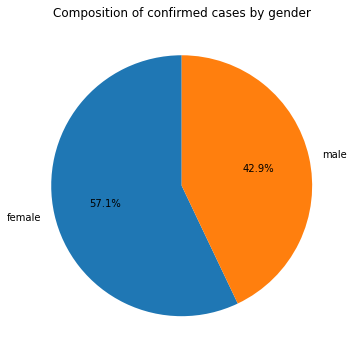

In [54]:
plt.figure(figsize=(8, 6))
plt.title('Composition of confirmed cases by gender')
plt.pie(gender_df, labels=gender_df.index, autopct='%1.1f%%', startangle=90)
plt.show()

In [55]:
gender_df = time_gender[time_gender.date==time_gender.date.iloc[-1]].groupby('sex').sum().deceased
gender_df = gender_df.sort_values(ascending=False)

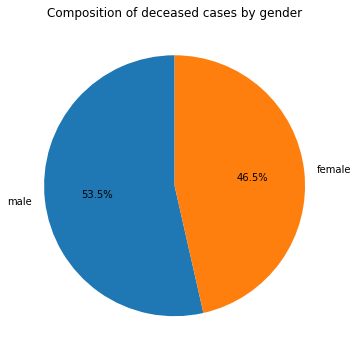

In [56]:
plt.figure(figsize=(8, 6))
plt.title('Composition of deceased cases by gender')
plt.pie(gender_df, labels=gender_df.index, autopct='%1.1f%%', startangle=90)
plt.show()

**4.4. Weather Related**

In [57]:
region_count = case.groupby('province').sum().confirmed

In [58]:
min_temp = weather.groupby('province').min_temp.mean()

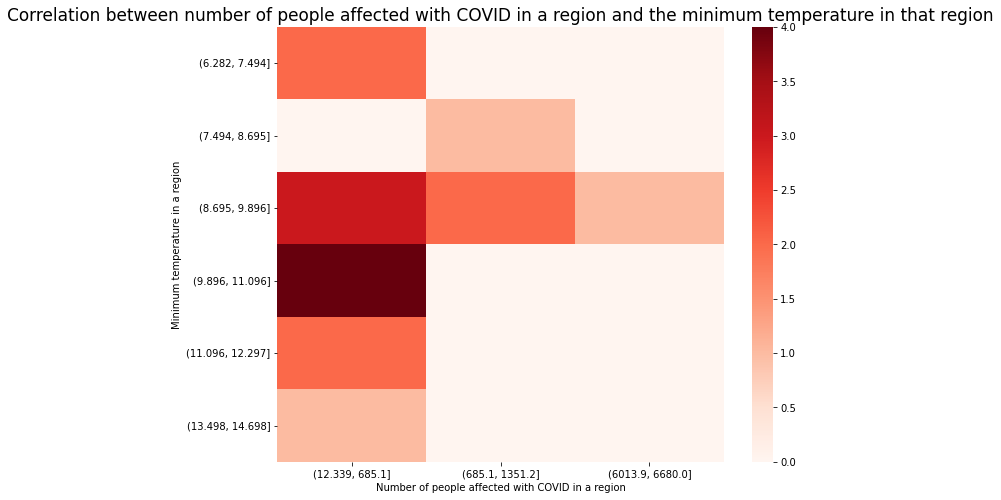

In [59]:
x_bins = pd.cut(min_temp, 10)
y_bins = pd.cut(region_count, 10)

plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(x_bins, y_bins), cmap='Reds')
plt.title('Correlation between number of people affected with COVID in a region and the minimum temperature in that region', fontsize=17)
plt.xlabel('Number of people affected with COVID in a region')
plt.ylabel('Minimum temperature in a region')
plt.show()

Here we see that regions with the smallest temperatures on average aren't that much coorelated with COVID infections.

In [60]:
precipitation = weather.groupby('province').precipitation.mean()

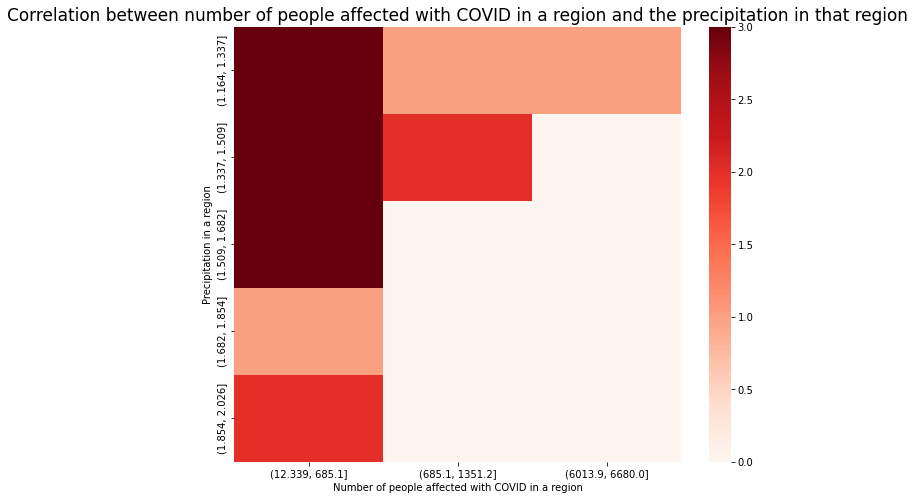

In [61]:
x_bins = pd.cut(precipitation, 10)
y_bins = pd.cut(region_count, 10)

plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(x_bins, y_bins), cmap='Reds')
plt.title('Correlation between number of people affected with COVID in a region and the precipitation in that region', fontsize=17)
plt.xlabel('Number of people affected with COVID in a region')
plt.ylabel('Precipitation in a region')
plt.show()

Higher precipitation level is not related to higher infection rates.

In [62]:
humidity = weather.groupby('province').avg_relative_humidity.mean()

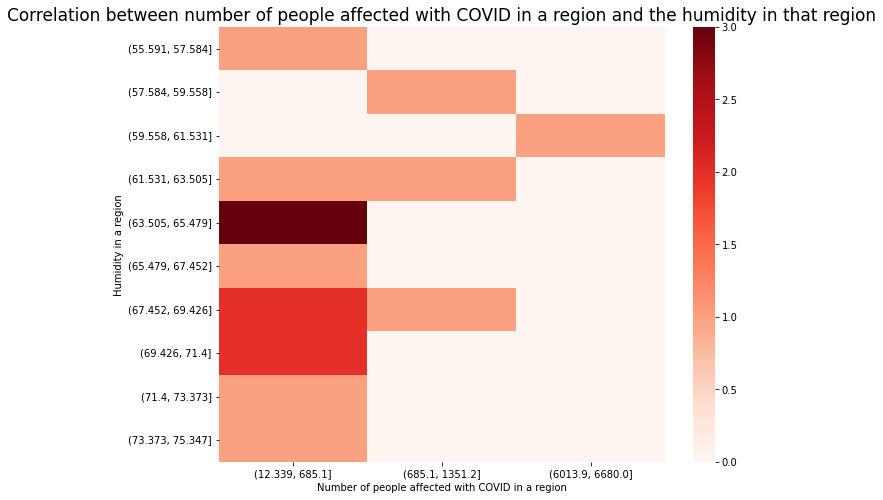

In [63]:
x_bins = pd.cut(humidity, 10)
y_bins = pd.cut(region_count, 10)

plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(x_bins, y_bins), cmap='Reds')
plt.title('Correlation between number of people affected with COVID in a region and the humidity in that region', fontsize=17)
plt.xlabel('Number of people affected with COVID in a region')
plt.ylabel('Humidity in a region')
plt.show()

Still higher humidity regions aren't the ones affected with COVID

**4.5. Case Related**

In [64]:
group_gathering = case[case.group==True].groupby('province').sum().confirmed
all_confirmed = case.groupby('province').sum().confirmed

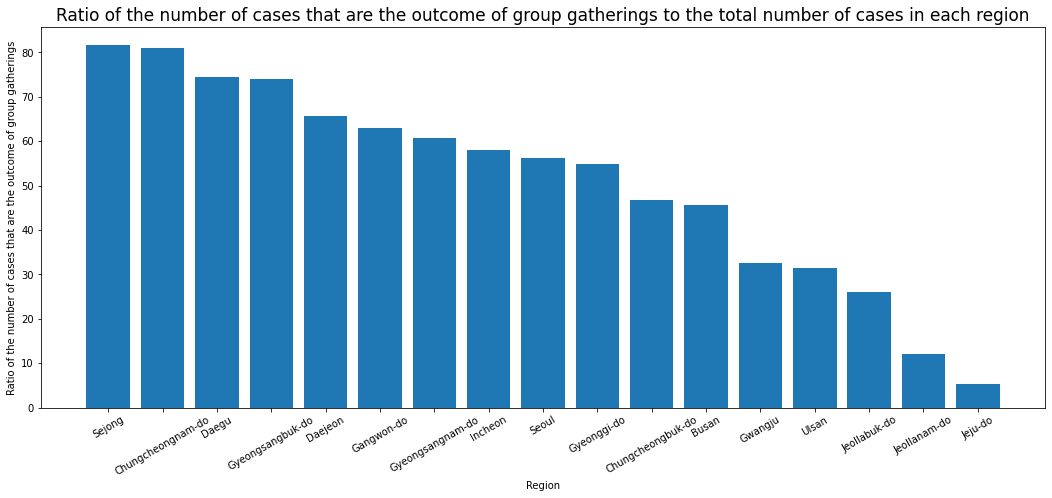

In [65]:
group_gathering_ratio = (group_gathering/all_confirmed)*100

group_gathering_ratio = group_gathering_ratio.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(18, 7))
plt.title('Ratio of the number of cases that are the outcome of group gatherings to the total number of cases in each region', fontsize=17)
plt.xticks(rotation=30)
plt.bar(group_gathering_ratio.index, group_gathering_ratio)
plt.xlabel('Region')
plt.ylabel('Ratio of the number of cases that are the outcome of group gatherings')
plt.show()

Here we see that in the most affected regions we don't see more group gathering causes. Although the province Sejong has the most cases attributed from group gatherings.

In [66]:
infection_case = case.infection_case.tolist()

infection_case_dict = {}
for i in range(len(infection_case)):
    if infection_case[i] in infection_case_dict:
        infection_case_dict[infection_case[i]] += 1
    else:
        infection_case_dict[infection_case[i]] = 1

Store the count of each site in a dictionary

In [67]:
infection_case_df = pd.DataFrame(infection_case_dict.items(), columns=['infection_case', 'count'])

infection_case_df = infection_case_df.sort_values('count', ascending=False)
infection_case_df

,infection_case,count
37,etc,17
35,overseas inflow,17
36,contact with patient,16
20,Shincheonji Church,15
0,Itaewon Clubs,9
...,...,...
43,Second Mi-Ju Hospital,1
44,Hansarang Convalescent Hospital,1
45,Daesil Convalescent Hospital,1
46,Fatima Hospital,1


In [68]:
infection_case_df

,infection_case,count
37,etc,17
35,overseas inflow,17
36,contact with patient,16
20,Shincheonji Church,15
0,Itaewon Clubs,9
...,...,...
43,Second Mi-Ju Hospital,1
44,Hansarang Convalescent Hospital,1
45,Daesil Convalescent Hospital,1
46,Fatima Hospital,1


Here we see other than etc (other) infection cases we see that overseas inflow and direct contact with a patient have the most effect. But the factor of group gatherings is still indeliable as most of the rest cases are a result of group gatherings.

In [69]:
infection_case_df = infection_case_df[infection_case_df.infection_case!='etc']
infection_case_df = infection_case_df[infection_case_df.infection_case!='overseas inflow']
infection_case_df = infection_case_df[infection_case_df.infection_case!='contact with patient']

Let's drop the rows that aren't concerned with group gatherings.

In [70]:
shincheonji_church = case[case.infection_case=='Shincheonji Church']
shincheonji_church = shincheonji_church.province.unique()
list(shincheonji_church)

['Seoul',
 'Busan',
 'Daegu',
 'Gwangju',
 'Incheon',
 'Daejeon',
 'Ulsan',
 'Sejong',
 'Gyeonggi-do',
 'Gangwon-do',
 'Chungcheongbuk-do',
 'Jeollabuk-do',
 'Jeollanam-do',
 'Gyeongsangbuk-do',
 'Gyeongsangnam-do']

Provinces where we can find Shincheonji Church. Here we see that even in the most affected regions this church is found. Just by using this insight religious gatherings should be prohibited for some time.

In [71]:
itaewon_clubs = case[case.infection_case=='Itaewon Clubs']
itaewon_clubs = itaewon_clubs.province.unique()
list(itaewon_clubs)

['Seoul',
 'Busan',
 'Daegu',
 'Incheon',
 'Gyeonggi-do',
 'Chungcheongbuk-do',
 'Jeollabuk-do',
 'Gyeongsangnam-do',
 'Jeju-do']

Itaewon Club, a dance club, has also taken a great share of most infections.

In [72]:
case_copy = case.copy()
case_copy = case_copy[case_copy.latitude!='-']
case_copy = case_copy[case_copy.longitude!='-']

case_copy.latitude = case_copy.latitude.astype(float).round(2)
case_copy.longitude = case_copy.longitude.astype(float).round(2)

# get the number of cases in each province
province_lat = case_copy.groupby('province').latitude.mean()
province_long = case_copy.groupby('province').longitude.mean()
province_count = case.groupby('province').sum().confirmed

# create a dataframe of the latitude, longitude, and number of cases in each province
province_df = pd.DataFrame({'latitude':province_lat, 'longitude':province_long, 'count':province_count})
province_df = province_df.dropna() # not possible without this

In [73]:
m = folium.Map(location=[36.5, 127.5], zoom_start=7, tiles='cartodbpositron')
HeatMap(data=province_df, radius=15).add_to(m)
m

This map might not be displayed on GitHub. Open the notebook in colab to view this part.

**4.6. Policy Related**

In [74]:
policy_raw = policy.copy()
if (sum(policy_raw.index+1 == policy_raw.policy_id) == len(policy_raw) 
   ) and ( len(policy_raw.country.unique()) == 1 ):
  policy_compact = policy_raw.iloc[:, 2:]

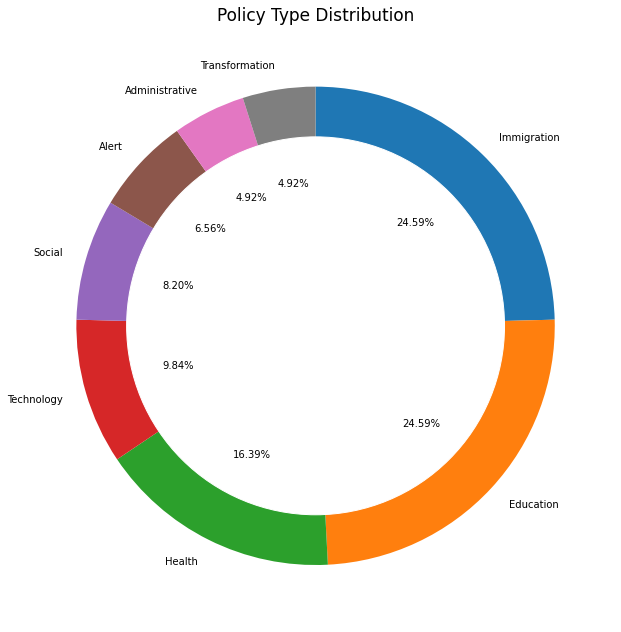

In [75]:
fig, ax = plt.subplots(figsize=(11, 11))
plt.title(f'Policy Type Distribution', fontsize=17)
pop_circle = plt.Circle((0,0), 0.79, color='white')
plt.pie(policy_compact.type.value_counts(), 
        labels = policy_compact.type.value_counts().index, 
        autopct = '%.2f%%', 
        startangle = 90, 
        counterclock = False
        )
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()

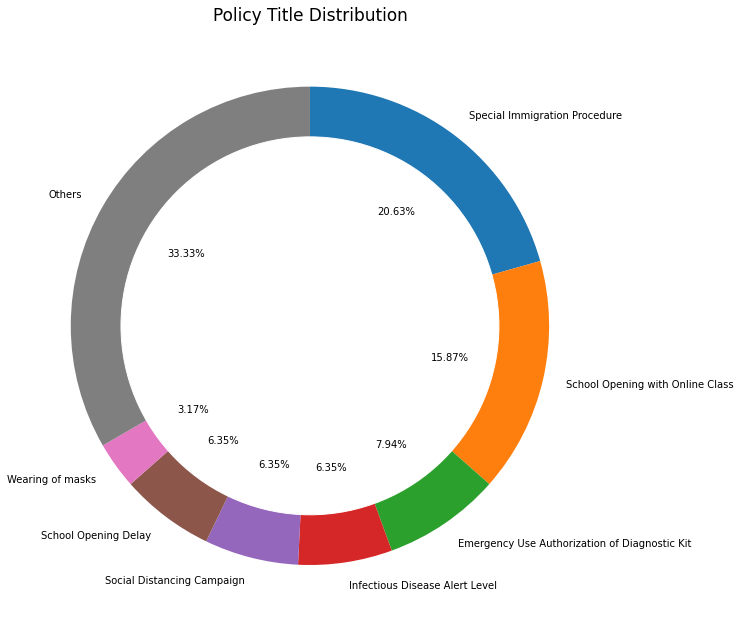

In [76]:
policy_titles = pd.DataFrame(policy_compact.gov_policy.value_counts().items(), columns=['title', 'counts'])
policy_titles.loc[len(policy_titles), 'title'] = 'Others'
policy_titles.loc[len(policy_titles)-1, 'counts'] = policy_titles.iloc[6:, 1].sum()
policy_titles = pd.concat([policy_titles[:7], policy_titles[-1:]])

fig, ax = plt.subplots(figsize=(11, 11))
plt.title(f'Policy Title Distribution', fontsize=17)
pop_circle = plt.Circle((0,0), 0.79, color='white')
plt.pie(policy_titles['counts']
        , labels = policy_titles['title']
        , autopct = '%.2f%%'
        , startangle = 90
        , counterclock = False)
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()

In [77]:
test_raw = time.copy()
for col in test_raw.columns[2:7]:
    if col in [2, 4]:
        new_dict = {0: 1}
    else:
        new_dict = {0: 0}
    new_dict.update({ i : test_raw[col][i] - test_raw[col][i-1] for i in range(1, len(test_raw)) })
    test_raw[f'new_{col}'] = new_dict.values()

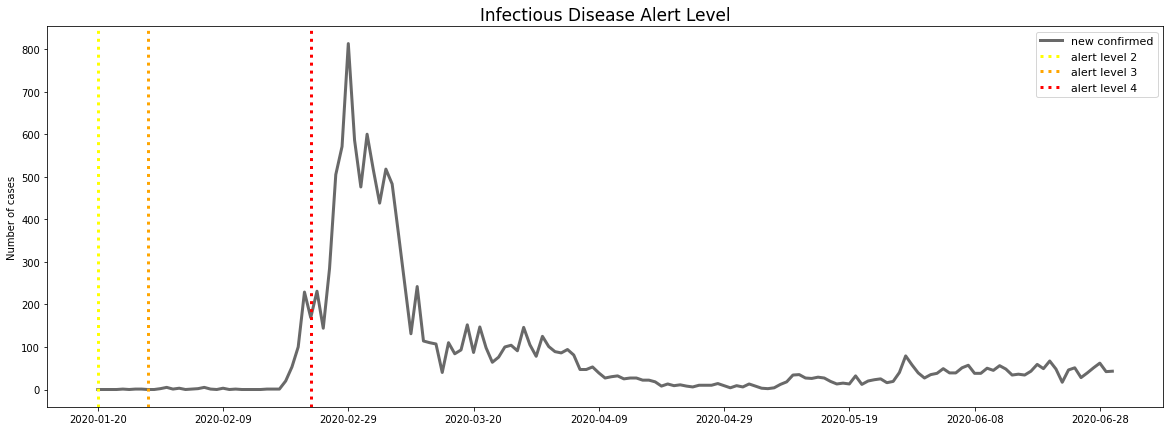

In [78]:
policy_alerts = policy_compact[ policy_compact.type == 'Alert' ]
fig, ax = plt.subplots(figsize=(20, 7))
plt.title('Infectious Disease Alert Level', size=17)
plt.plot(test_raw.date.unique(), test_raw.new_confirmed
         , color='dimgray'
         , lw=3)
ax.set_xticks(ax.get_xticks()[::int(len(test_raw.date.unique())/8)])
for day, color in zip(policy_alerts.start_date.values[1:], ['yellow', 'orange', 'red']):
    ax.axvline(day, ls=':', color=color, lw=3)
ax.legend(['new confirmed', 'alert level 2', 'alert level 3', 'alert level 4'], fontsize=11)
plt.ylabel('Number of cases')
plt.show()

Here we see that it is after alert level 4 that most number of new confirmed cases happened.

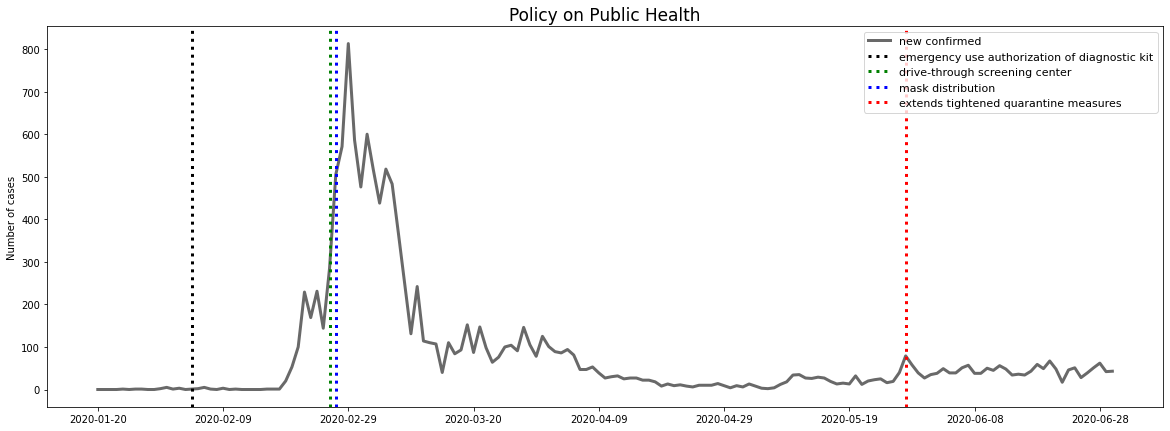

In [79]:
first_policy = { i[1].start_date.values[0]: i[0].lower() 
                for i in policy_raw[policy_raw.type=='Health'].groupby(['gov_policy']) }
first_policy = dict(sorted(first_policy.items()))

fig, ax = plt.subplots(figsize=(20, 7))
plt.title('Policy on Public Health', size=17)
plt.plot(test_raw.date.unique(), test_raw.new_confirmed
         , color='dimgray', lw=3)
ax.set_xticks(ax.get_xticks()[::int(len(test_raw.date.unique())/8)])
for date, color in zip(first_policy.keys(), ['black','green', 'blue', 'red']):
    ax.axvline(date, ls=':', color=color, lw=3)
ax.legend(['new confirmed'] + list(first_policy.values())
          , fontsize=11, loc='upper right')
plt.ylabel('Number of cases')
plt.show()

After extension of tightened quarantine measures we see that cases haven't been increasing drastically.

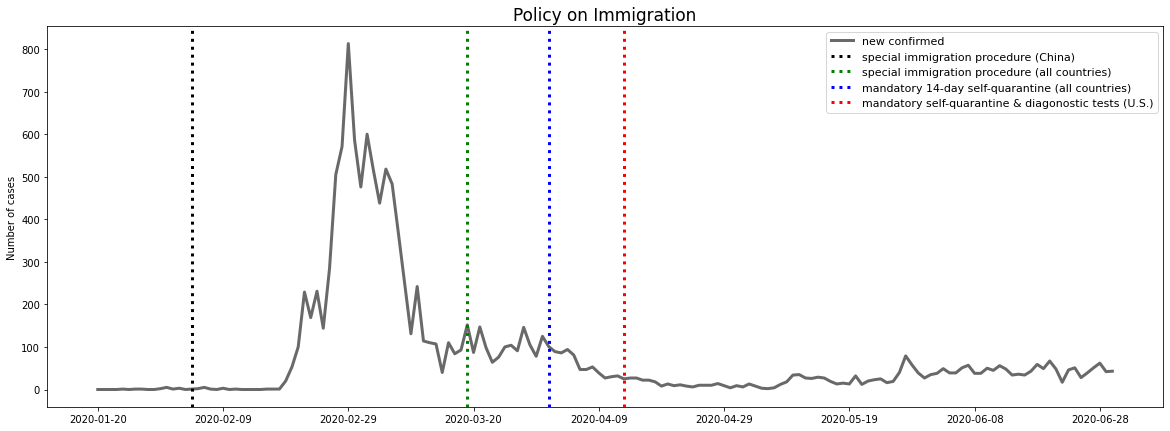

In [80]:
policy_immi = policy_raw[ policy_raw.type == 'Immigration' ].head(1).append(
              policy_raw[ policy_raw.type == 'Immigration' ].tail(3))
add = lambda x, y: x + y
policy_list = list( map(add, map( lambda x: x.lower(), policy_immi.gov_policy.values)
                  , map( lambda x: ' (' + x[5:].replace(' the', '') +')'
                  , policy_immi.detail.values)))

fig, ax = plt.subplots(figsize=(20, 7))
plt.title('Policy on Immigration', size=17)
plt.plot(test_raw.date.unique(), test_raw.new_confirmed
         , color='dimgray'
         , lw=3)
ax.set_xticks(ax.get_xticks()[::int(len(test_raw.date.unique())/8)])
for day, color in zip(policy_immi.start_date.unique(), ['black','green', 'blue', 'red']):
    ax.axvline(day, ls=':', color=color, lw=3)
ax.legend(['new confirmed'] + policy_list, fontsize=11
           , loc='upper right')
plt.ylabel('Number of cases')
plt.show()

After enforcing special immigration procedure for all countries we see that the number of cases started decreasing.

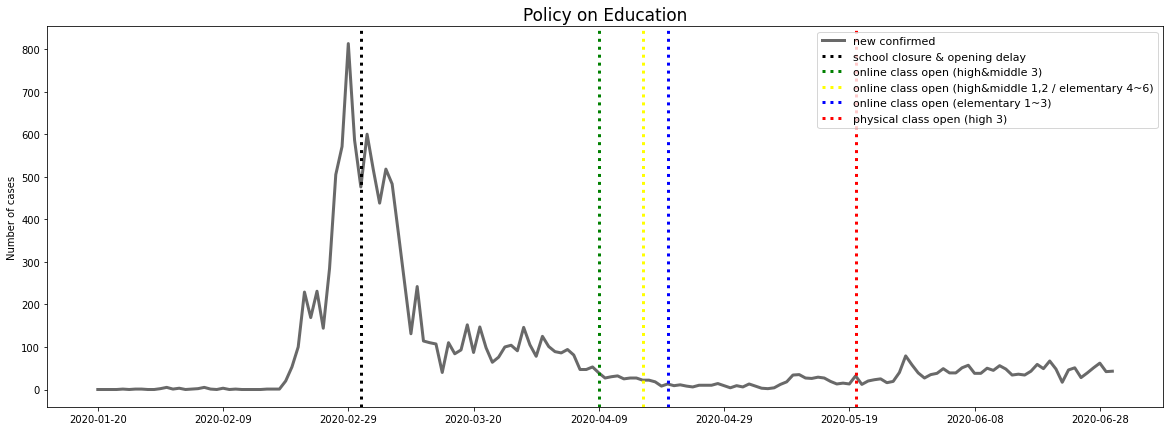

In [81]:
policy_edu = policy_compact[ policy_compact.type == 'Education' ]
fig, ax = plt.subplots(figsize=(20, 7))
plt.title('Policy on Education', size=17)
plt.plot(test_raw.date.unique(), test_raw.new_confirmed
         , color='dimgray'
         , lw=3)
ax.set_xticks(ax.get_xticks()[::int(len(test_raw.date.unique())/8)])
for day, color in zip(policy_edu.start_date.unique(), ['black','green', 'yellow', 'blue', 'red']):
    ax.axvline(day, ls=':', color=color, lw=3)
ax.axvline('2020-05-20', ls=':', color='red', lw=3)
ax.legend(['new confirmed', 'school closure & opening delay', 
           'online class open (high&middle 3)', 
           'online class open (high&middle 1,2 / elementary 4~6)', 
           'online class open (elementary 1~3)', 
           'physical class open (high 3)'
           ], 
          fontsize=11, 
          loc='upper right')
plt.ylabel('Number of cases')
plt.show()

## 5. Prediction

In [82]:
prediction_df = patient_info.copy()
prediction_df.confirmed_date = pd.to_datetime(prediction_df.confirmed_date)

daily_count = prediction_df.groupby(prediction_df.confirmed_date).patient_id.count()

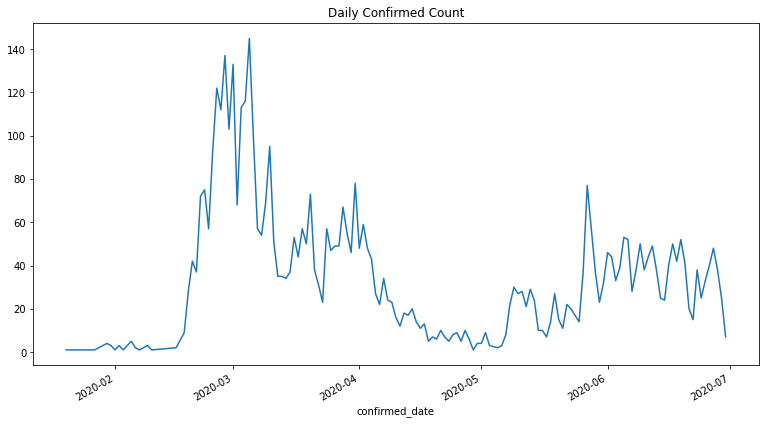

In [83]:
plt.figure(figsize=(13,7))
daily_count.plot()
plt.title('Daily Confirmed Count')
plt.show()

In [84]:
daily_count_df = pd.DataFrame({'date':daily_count.index, 'count':daily_count.values})

daily_count_df['days'] = (daily_count_df.date - daily_count_df.date.min()).dt.days

daily_count_df['days_squared'] = daily_count_df.days**2

daily_count_df['days_cubed'] = daily_count_df.days**3

In [85]:
model = LinearRegression()

_ = model.fit(daily_count_df[['days', 'days_squared', 'days_cubed']], daily_count_df['count'])

In [ ]:
days = np.arange(0, 365)
days_squared = days**2
days_cubed = days**3
predicted_cases = model.predict(np.array([days, days_squared, days_cubed]).T)

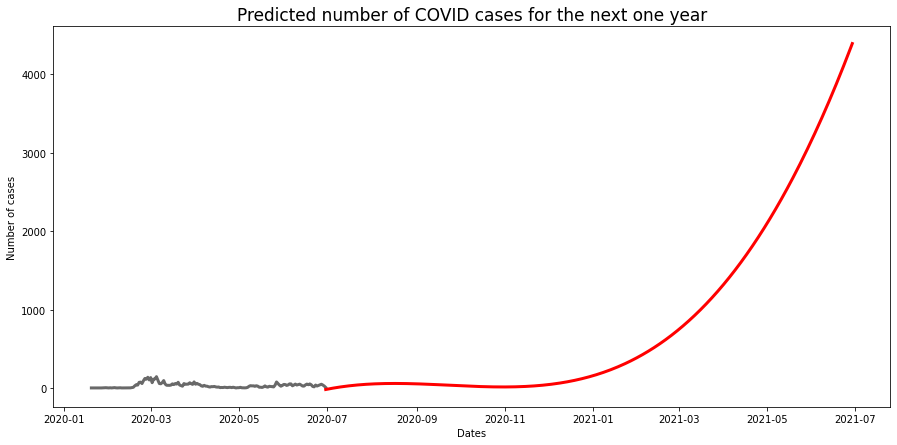

In [87]:
plt.figure(figsize=(15, 7))
plt.plot(daily_count_df.date, daily_count_df['count'], color='dimgray', lw=3)
plt.plot(daily_count_df.date.max() + pd.to_timedelta(days, unit='D'), predicted_cases, color='red', lw=3)
plt.title('Predicted number of COVID cases for the next one year', size=17)
plt.xlabel('Dates')
plt.ylabel('Number of cases')
plt.show()

##6. Findings

**6.1. EDA and Visulaizations Findings**

1. Daegu and Gyeongsangbuk-do are the provinces with the highest COVID infection rates (nearly 70%), so they require special attention. These areas are the most affected during the outbreak of infections between 2020-03-20 and 2020-04-09.
2. Except for Gyeongsangbuk-do, we don't see many elderly people in the most affected provinces, and having a large elderly proportion cannot be attributed to having more infection cases. This is also true in the case of a deceased person. Despite this, we see that elderly people, particularly those in their 80s, are the most frequently deceased patients, necessitating immediate attention.
3. Having a higher number of school counts can not be really attributed to higher infection levels.
4. Our analysis shows that people in their twenties are the most affected, but there is little to no death in that age group. This means that younger people are more likely to recover after contracting the virus. Higher infection rates in this age group can be attributed to young people's outgoing behavior. Despite the fact that the elderly are not the most affected, they have the highest death toll. Surprisingly, people in their 70s are followed by people in their 80s, who are followed by people in their 60s.
5. People in their 50s have the highest transmission rates (transmitting COVID to others), followed by people in their 60s and 20s. We can see that most younger people are not attributed to transmissions, but their role is not insignificant. So pay close attention to those.
6. We can also see that females outnumber males in terms of confirmed cases, but males outnumber females in terms of deceased cases, despite the fact that their percentage is comparable.
7. We've also seen that colder weather isn't associated with an increase in COVID infections. We've seen that lower temperatures, more precipitation, and higher humidity do not all lead to higher levels of COVID infection.
8. When we look at the effect of mass gatherings, we see that the most affected areas also have more cases of COVID group infection. As a result, mass gatherings should be avoided in the future.
9. We also discovered that the cases were linked to two different locations. Shincheonji Church and Itaewon Clubs have the most infection cases, which means that public gatherings such as religious gatherings (like Shincheonji Church) and event centers (like Itaewon Clubs) are also significant contributors to COVID infections, so it is preferable to manage traffic to those locations.
10. Aside from the factors mentioned in number 9, overseas inflow and contact with a patient are also major risk factors for infection.
11. When we examine the impact of policies. Immigration, education, and health policies receive the most attention in the policy distribution.
12. We see a large burst of confirmed cases after declaring alert level 4, but the alert was issued on time. Following the establishment of drive-through screening centers. COVID cases have increased, possibly as a result of the extensive checking that occurred during this time period.
13. We also see that after quarantine measures were extended, the number of cases did not significantly increase. After instituting special immigration procedures in all countries, the number of cases has decreased, implying that having such procedures is a good practice. Self-quarantine measures have also been beneficial in reducing the number of cases.
14. After school closure and opening delay measures were implemented, we saw that the number of cases gradually decreased.

**6.2. Predicion Findings**

From the simple linear regression model that we use we can see that the number of COVID cases are predicted to be increasing. Eventhough we see that it is a very uniform curve where it should have been more of a rugged curve. But all in all we can at least see what the future trend would look like.

##7. Conclusion

In conclusion, our analysis has provided valuable insights into the factors that contribute to the spread of COVID-19 in South Korea. We have identified the provinces with the highest infection rates and highlighted the importance of paying close attention to the elderly population, who are the most vulnerable to the virus. Our findings have also revealed the impact of mass gatherings and the significant role they play in the transmission of the virus. We have analyzed the impact of various policies and measures implemented by the government and their effectiveness in reducing the number of cases.

However, there are still areas that require further exploration and improvement, such as the need for more detailed data on the demographics of COVID-19 patients and the identification of specific transmission routes. Additionally, our prediction model indicates a potential increase in the number of cases, underscoring the importance of continued vigilance and adherence to public health measures. Overall, this study provides valuable insights that can inform future efforts to combat the COVID-19 pandemic in South Korea and beyond.